## Análisis exp inducción: una bobina dentro de otra

- $Lp = 0.07$ $mH$ (res. int. $r_{Lp}=5\Omega$)
- $Ls=50$ $mH$ (res. int. $r_{Lp}=49\Omega$)
- $R=100$ $\Omega$
- $V_{in}$ sinusoidal amplitud $1V$. Barrido en frecuencias $10-2k$ $Hz$

Se midio la amplitud sobre la resistencia ($v_R$) y sobre el secundario ($v_s$) en función de la frecuencia $f$.

Exporto librerias a utilizar,

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### 1 - Caso SIN núcleo 

Cargo datos,


In [5]:
arx = "data/induccion_SN.csv"
df = pd.read_csv( arx )
df.head()

,f,vs,vR
0,10.00000,-0.001327,0.645660
1,30.10101,0.002463,0.645629
2,50.20202,0.005728,0.644737
3,70.30303,0.005618,0.644451
4,90.40404,0.004009,0.647370


exploro

Induct. mutua teorica, M:
M teo. : 0.001871


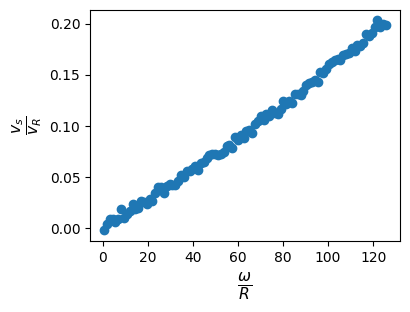

In [6]:
# valores medidos
R = 100
Lp = 0.07e-3
Ls = 50e-3

print ("Induct. mutua teorica, M:")
M_th = np.sqrt(Lp*Ls)
print( f"M teo. : {M_th:.6f}"  )

# tomo data
y = df["vs"].to_numpy()/df["vR"].to_numpy() # vs/vR
x = df["f"].to_numpy()*2*np.pi/R # w/R

# plot exploratorio
fig,ax = plt.subplots(figsize=(4,3))

ax.scatter(x,y)

ax.set_xlabel(r"$\frac{\omega}{R}$", fontsize=16)
ax.set_ylabel(r"$\frac{v_s}{v_R}$", fontsize=16)
plt.show()

ajusto modelo lineal para obtener $M$ experimental

Parámetros obtenidos del ajuste:
M exp. = (0.001610 ± 0.000011) 
a = (-0.005251 ± 0.000838) 


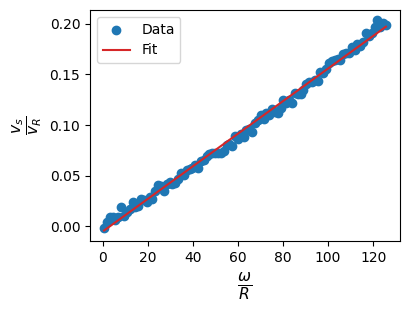

In [7]:
def modelo(x, a, M):
    return a+M*x

#semillas
a_ini=0
M_ini=1
p0 = [a_ini,M_ini]

#ajuste
popt, pcov = curve_fit(modelo, x, y, p0=p0)      
a_exp, M_exp = popt

# Errores estandar
SE_a, SE_M = np.sqrt(np.diag(pcov))

print ("Parámetros obtenidos del ajuste:")
print(f"M exp. = ({M_exp:.6f} ± {SE_M:.6f}) ")
print(f"a = ({a_exp:.6f} ± {SE_a:.6f}) ")


fig,ax = plt.subplots(figsize=(4,3))

ax.scatter(x,y, label='Data')
ax.plot( x, modelo(x, *popt), c='C3', label='Fit' )

ax.set_xlabel(r"$\frac{\omega}{R}$", fontsize=16)
ax.set_ylabel(r"$\frac{v_s}{v_R}$", fontsize=16)
ax.legend(loc=2)
plt.show()

vemos que la inductancia mutua teórica difiere de la experimental, eso es por que la constante de acoplamiento $k \neq 1 $, tengo,

$$
M_{exp} = k \sqrt{Lp Ls} = k M_{teo}
$$

entonces el acoplamiento $k$ viene dado por, 

In [8]:
k = M_exp/M_th

print (f"Constante acop. k = {k:.4}")

Constante acop. k = 0.8608


### 2- Caso CON núcleo 

In [9]:
arx = "data/induccion_CN.csv"
df = pd.read_csv( arx )
df.head()

,f,vs,vR
0,10.00000,0.004549,0.648471
1,30.10101,0.008604,0.644541
2,50.20202,0.023882,0.646609
3,70.30303,0.033155,0.646269
4,90.40404,0.044494,0.646340


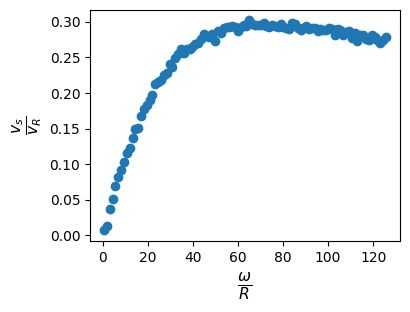

In [10]:
# valores medidos, mismo que antes
R = 100
Lp = 0.07e-3
Ls = 50e-3

# tomo data
y = df["vs"].to_numpy()/df["vR"].to_numpy() # vs/vR
x = df["f"].to_numpy()*2*np.pi/R # w/R

# plot exploratorio
fig,ax = plt.subplots(figsize=(4,3))

ax.scatter(x,y)

ax.set_xlabel(r"$\frac{\omega}{R}$", fontsize=16)
ax.set_ylabel(r"$\frac{v_s}{v_R}$", fontsize=16)
plt.show()

Parámetros obtenidos del ajuste:
M exp. (con nucleo) = (0.009396 ± 0.000286) 
a = (0.008880 ± 0.003330) 


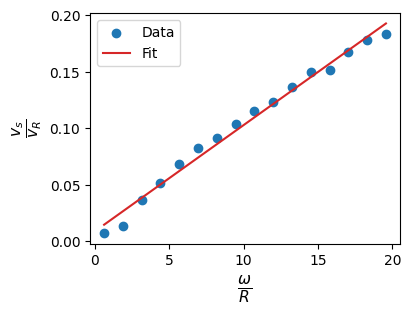

In [11]:
def modelo(x, a, M):
    return a+M*x

#semillas
a_ini=0
M_ini=1
p0 = [a_ini,M_ini]

# Ajusto solo parte lineal: tomo datos en el rango x<20
x1 = x[x<20]
y1 = y[x<20]

#ajuste
popt, pcov = curve_fit(modelo, x1, y1, p0=p0)      
a_exp, M_exp_cn = popt

# Errores estandar
SE_a, SE_M = np.sqrt(np.diag(pcov))

print ("Parámetros obtenidos del ajuste:")
print(f"M exp. (con nucleo) = ({M_exp_cn:.6f} ± {SE_M:.6f}) ")
print(f"a = ({a_exp:.6f} ± {SE_a:.6f}) ")


fig,ax = plt.subplots(figsize=(4,3))

ax.scatter(x1,y1, label='Data')
ax.plot( x1, modelo(x1, *popt), c='C3', label='Fit' )

ax.set_xlabel(r"$\frac{\omega}{R}$", fontsize=16)
ax.set_ylabel(r"$\frac{v_s}{v_R}$", fontsize=16)
ax.legend(loc=2)
plt.show()

vemos que la inductancia mutua crece con el núcleo, para una estimación de la permiabilidad magnética $\mu$ podemos calcular,

$$
\mu = \frac{M_{exp}^\prime}{M_{exp}}
$$

In [12]:
mu = M_exp_cn/ M_exp

print (f"Permiab. mag. del material mu : {mu:.4f}")

Permiab. mag. del material mu : 5.8346
